<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Explore graph and control statements, enumerate." </div>

> * Information **DATA**
> https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

- [1. Exploring The Dataset](#a)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Description](#1.2)
    - [1.3 Data Cleaning](#1.3)∑
        - [1.3.1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2.Data Visualization and Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Gender, Seniority, Partner and Pependends](#2.1)
    - [2.2 Services](#2.2)
    - [2.3 Security_support](#2.3)
    - [2.4 Contract type](#2.4)
    - [2.5 Churn analysis based on paying options](#2.5)
    - [2.6 Churn analysis based on tenure group](#2.6)
    - [2.7 Charges](#2.7)


<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
# Display all the column of the dataframes
pd.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [2]:
df = pd.read_csv('https://github.com/ManonYa09/Python_for_Data-Science-AI-/raw/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(columns= 'customerID',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="1.2"></a>
## <b>1.2 <span style='color:#00008B'>Data Description</span></b>

In [3]:
df.shape

(7043, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
def check_categorical_feature(df):
    cat_features = []
    for col in df.columns:
        if df[col].dtypes == 'O':
            cat_features.append(col)
    return cat_features

In [7]:
check_categorical_feature(df)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [8]:
# cat_features = [col for col in df.columns if df[col].dtypes == 'O']
# cat_features

In [9]:
# num_features = [col for col in df.columns if col not in cat_features]
# num_features, len(num_features)

In [10]:
categoric_columns = []
yes_no_columns = []
numeric_columns = []

def categorize_columns(dataset):
    columns = list(dataset.columns)
    
    for i in columns:
        if len(dataset[i].unique()) > 6:
            numeric_columns.append(i)
        elif len(dataset[i].unique()) == 2:
            yes_no_columns.append(i)
        else:
            categoric_columns.append(i)
    return categoric_columns, yes_no_columns, numeric_columns

In [11]:
categorize_columns(df)

(['MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaymentMethod'],
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'PaperlessBilling',
  'Churn'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


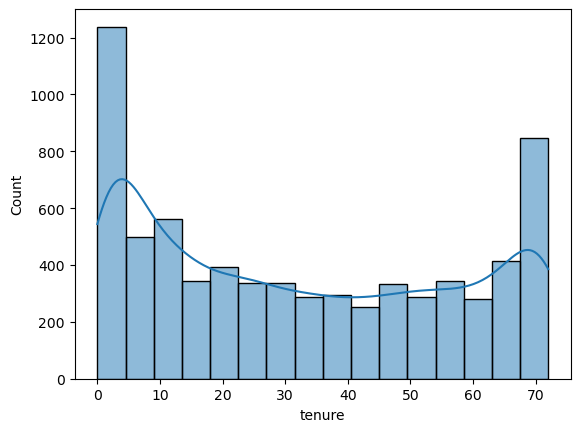

In [12]:
## Deal tunure 0 use interpolation
sns.histplot(data = df, x='tenure', kde=True)
plt.show()

<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [17]:
df.duplicated().sum()

22

In [18]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [19]:
df.drop_duplicates(inplace=True)

<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

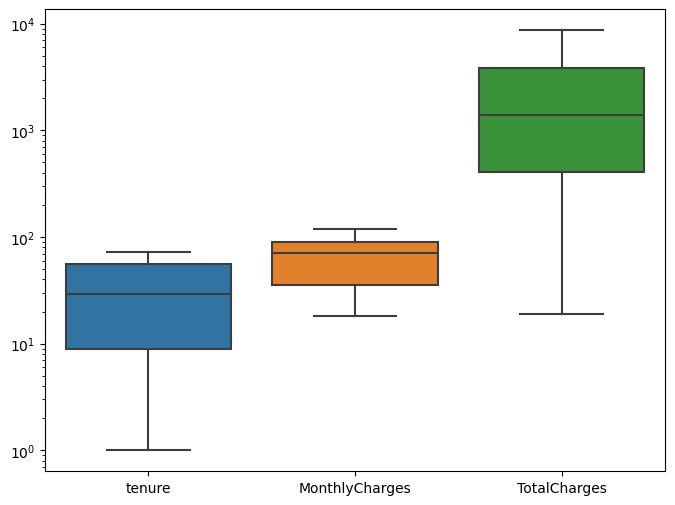

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data =df[numeric_columns])
plt.yscale('log')
plt.show()

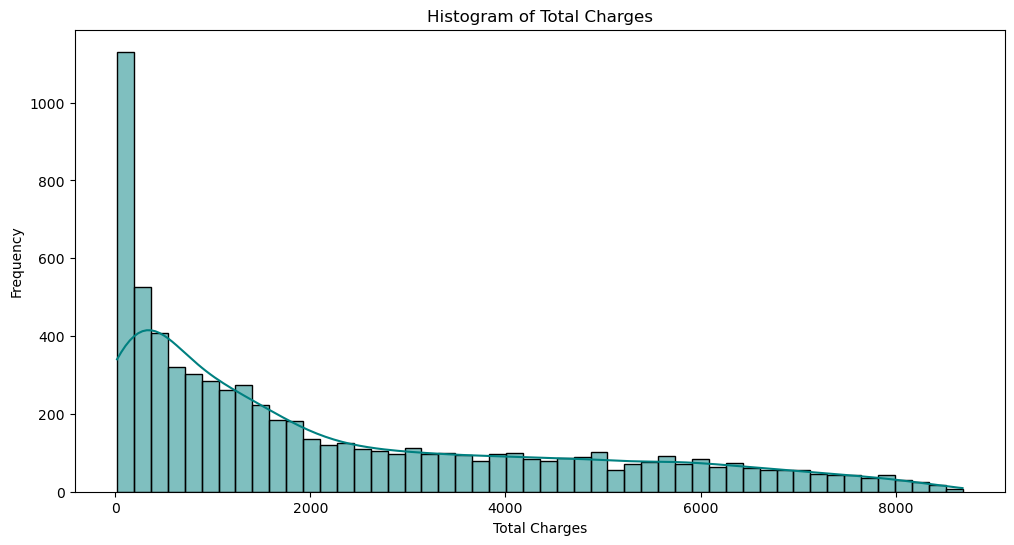

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['TotalCharges'], bins=50, kde=True, color='teal')

ax.set_xlabel('Total Charges')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Total Charges')

plt.show()


<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Exploratory Data Anlysis(EDA) with Data Visualization</div>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:blue;
            overflow:hidden;
            font-weight:700">Now, let's understand dataset based on:</div>


#### Gender, Senoirity, Parnter and Dependents
#### Services
#### Security_support
#### Contract type
#### Churn analysis based on paying options
#### Charges

<a id="2.1"></a>
# <b>2.1 <span style='color:#00008B'>Gender, Seniority, Partner and Dependends(Customer)</span></b>

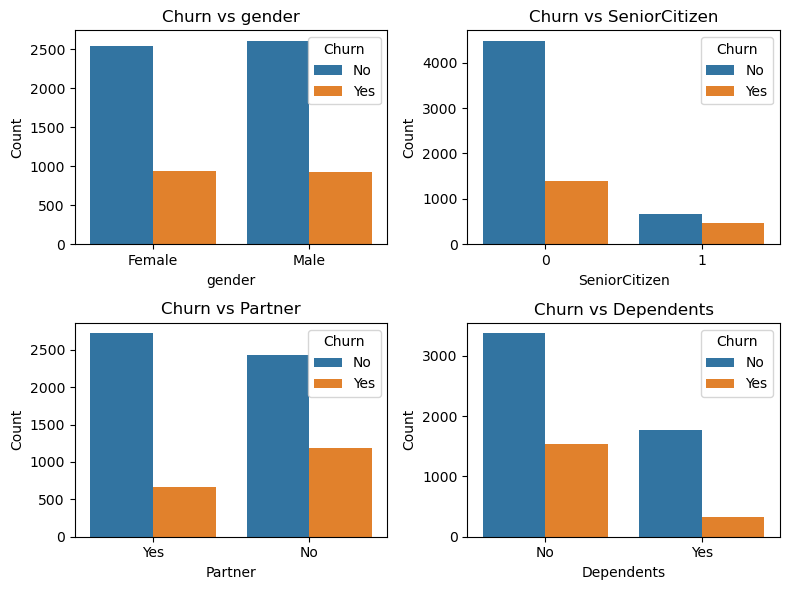

In [22]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6)) # 2x2 grid of plot

for i, ax in enumerate(axes.flat): # enumerate function is used to loop through each subplot in the grid
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout() # ensuring that each plot is evenly spaced within the figure
plt.show()

- **Gender** has **no influence** on whether the customer will churn or not. 
- **Non-senior** citizens **churn more** than non-senior in **absolute term** but in **relative term senior citizens churn more** often.
- **Customers without partner churn more** often than their counterparts.<br>
and finally, 
- **customers without dependants churn more** than customers with dependents.


<a id="2.2"></a>
# <b>2.2 <span style='color:#00008B'>Services</span></b>


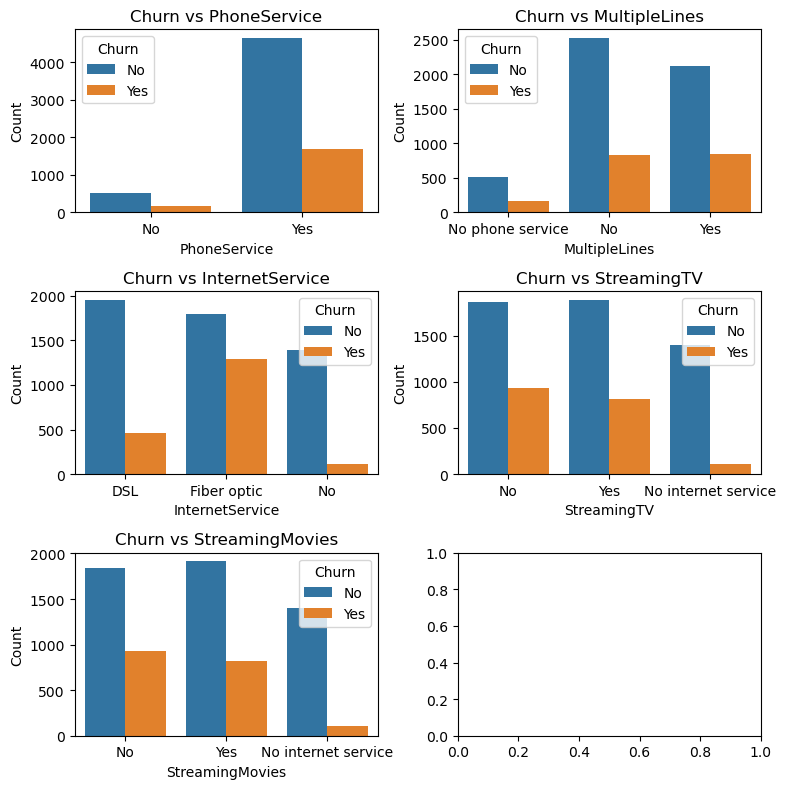

In [23]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
        
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


- Streaming TV, Streaming Movies, Multiple Lines have **no impact** on churn rate.
- Customers who have **fiber optic** tend to **churn** significantly more than ones that have DSL.

Now let's dive deeper into that finding.
We need gender, partner status, dependents status and senior status.

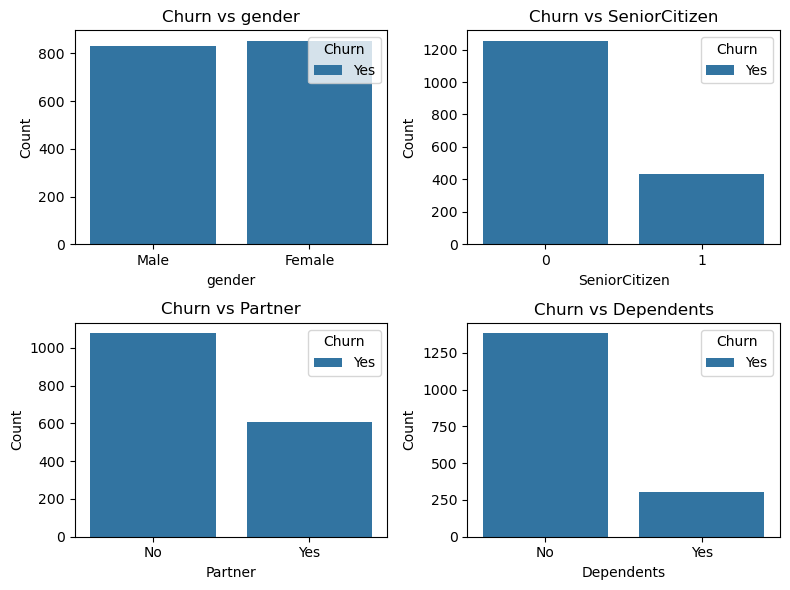

In [24]:
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We can conclude that customers who have churned and use phone service are likely to be **non-seniors, without partners and dependents.** We had got the same conclusion when analyzing the same variables regardless of customers' services.

Now let's investigate the customers who have fiber optic and who have churned.

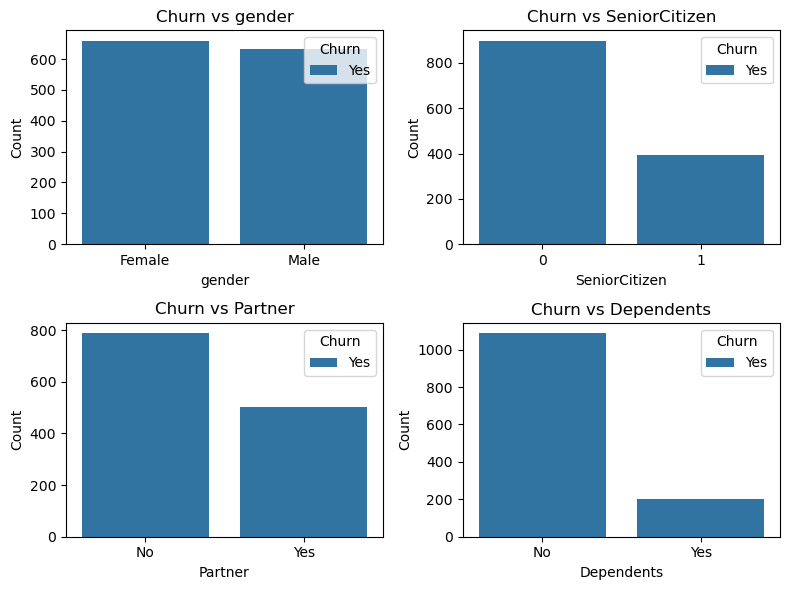

In [25]:
fiber_churn = df[(df['InternetService']=='Fiber optic') & (df['Churn'] == 'Yes')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fiber_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

The same conclusion applies for the customers that have churned and have fiber optic.

<a id="2.3"></a>
# <b>2.3 <span style='color:#00008B'>Security_support</span></b>


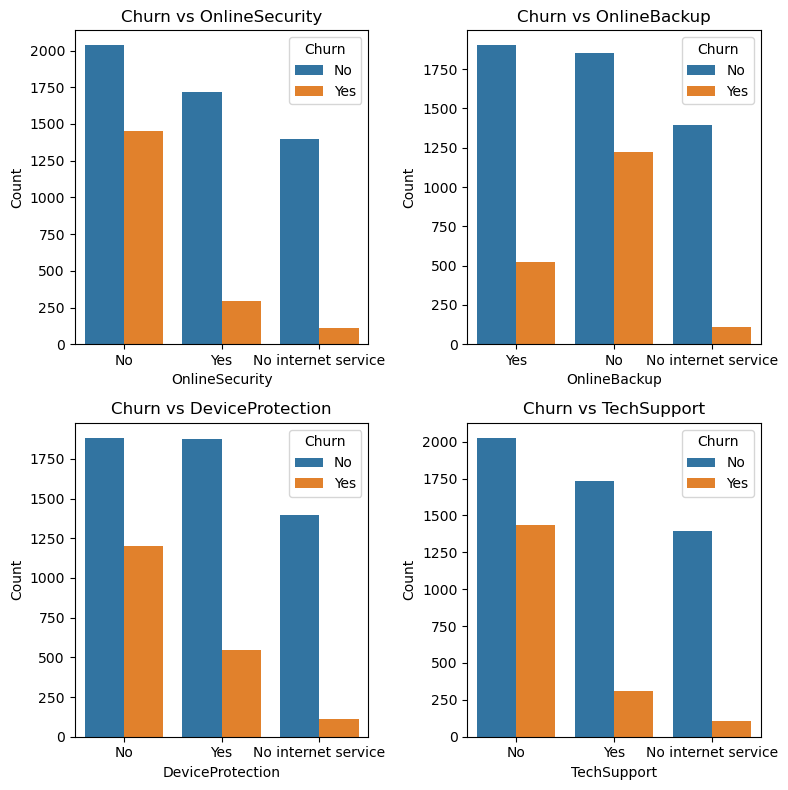

In [26]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

<a id="2.4"></a>
# <b>2.4 <span style='color:#00008B'>Contract type</span></b>


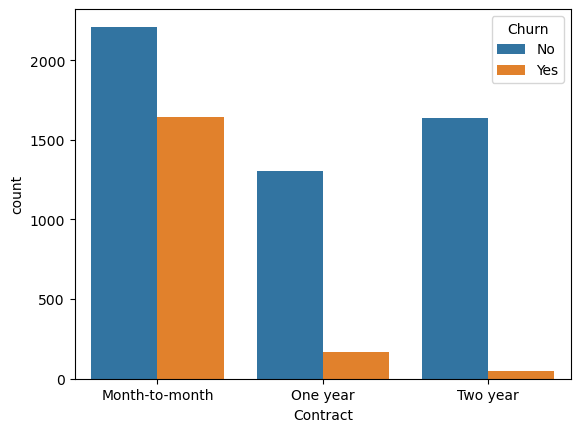

In [27]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')
plt.show()

Customers with **Month-to-month contracts** tend to **churn significantly more** often then customers with one year and two year contracts

<a id="2.5"></a>
# <b>2.5 <span style='color:#00008B'>Churn analysis based on paying options</span></b>
 

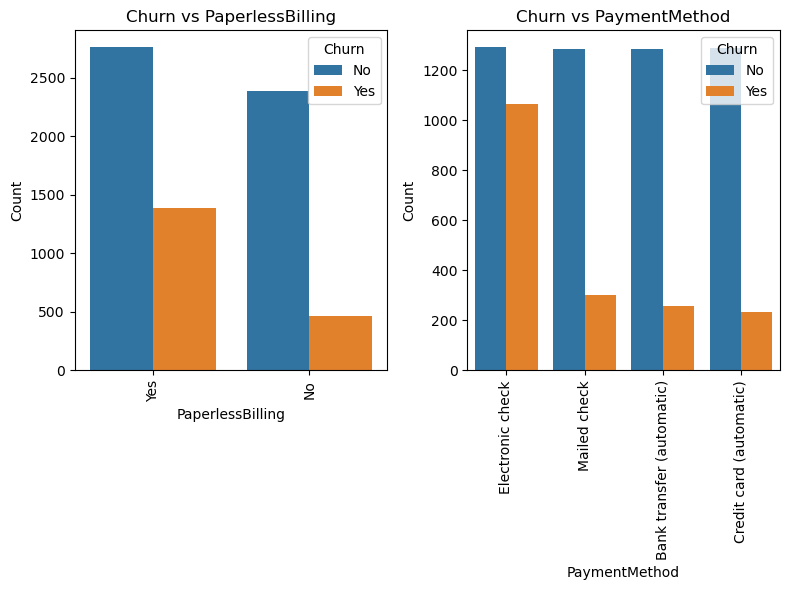

In [28]:
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


<a id="2.6"></a>
# <b>2.6 <span style='color:#00008B'>Churn analysis based on tenure group</span></b>


Customers with **paperless billing and electronic checks** are more likely to **churn** than customers without paperless billing and than the customers with other payment methods.

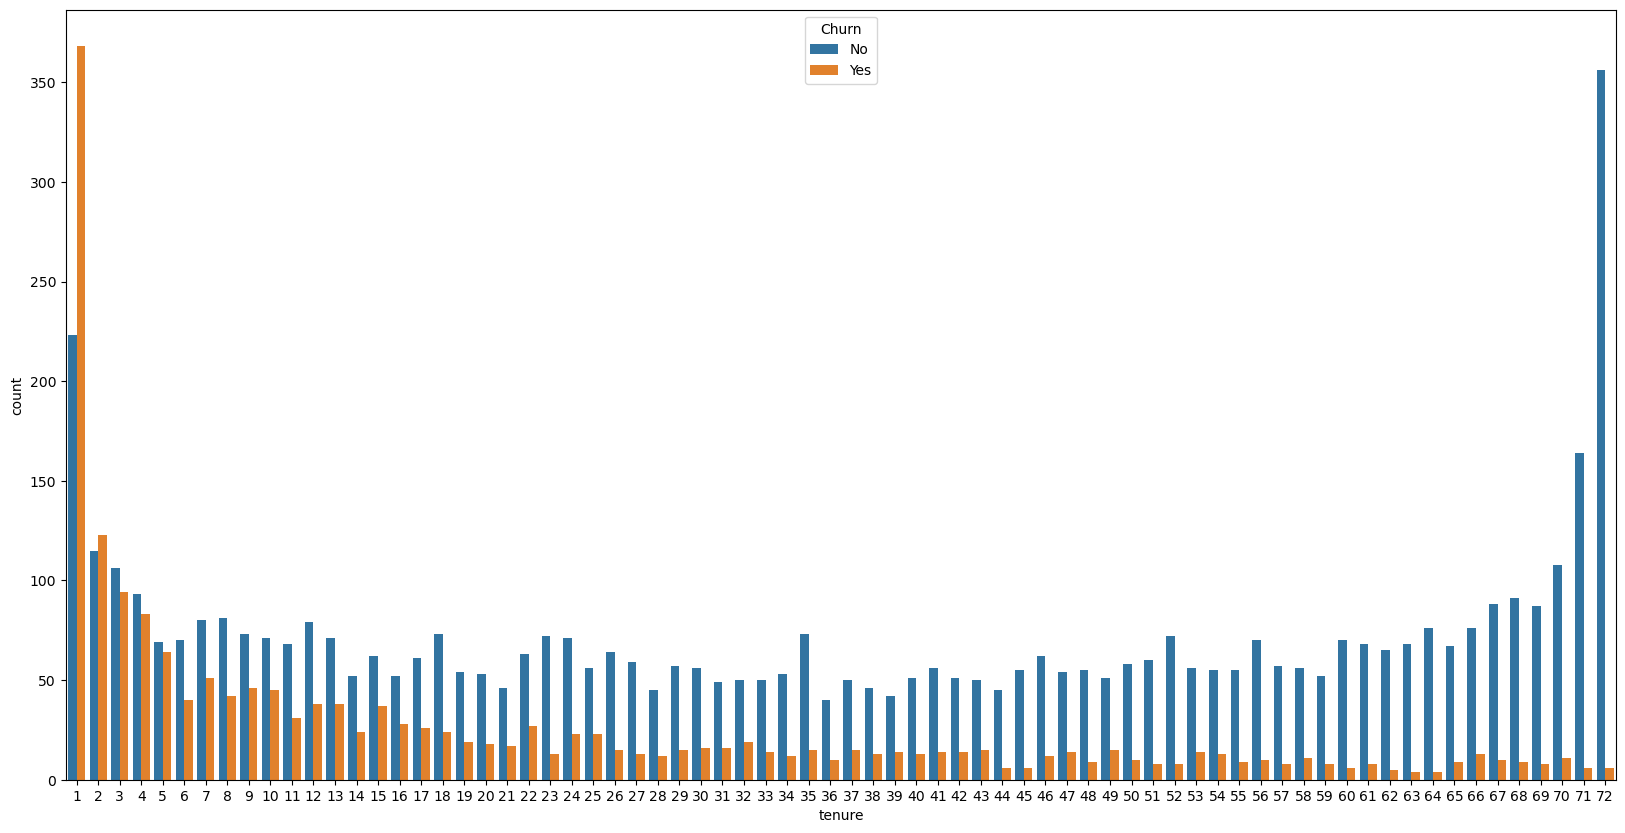

In [29]:
plt.figure(figsize=(20, 10))
sns.countplot(data = df, x = 'tenure', hue = 'Churn')
plt.show()

Customers who **spent less than 1 year** using our services tend to **churn substantially more** than the customers of other tenure groups.

As the **tenure increases**, the **churn rate decreases**

<a id="2.7"></a>
# <b>2.7 <span style='color:#00008B'>Charges</span></b>

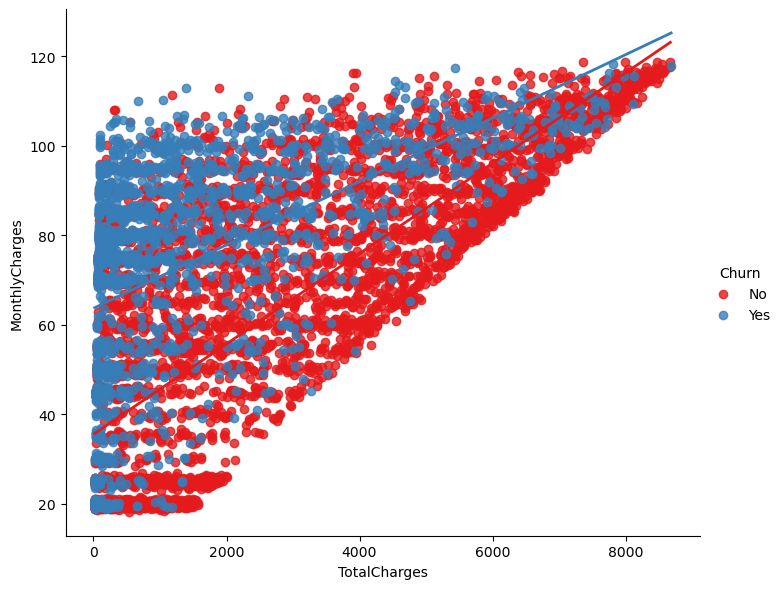

In [30]:

sns.lmplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', ci=None, height=6, aspect=1.2, palette='Set1', line_kws={'linewidth': 2})
sns.despine()
plt.show()


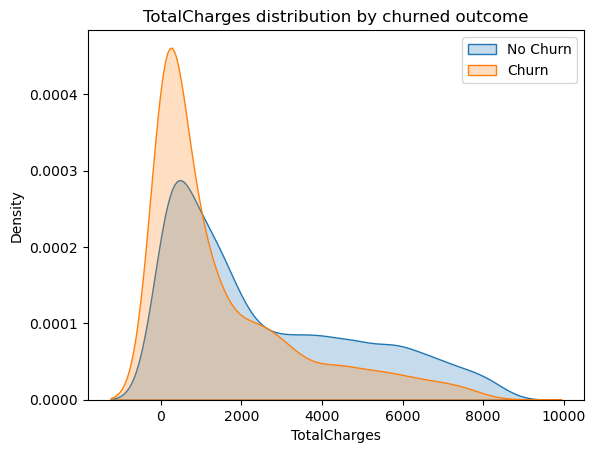

In [31]:
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('TotalCharges')
plt.title('TotalCharges distribution by churned outcome')
plt.show()

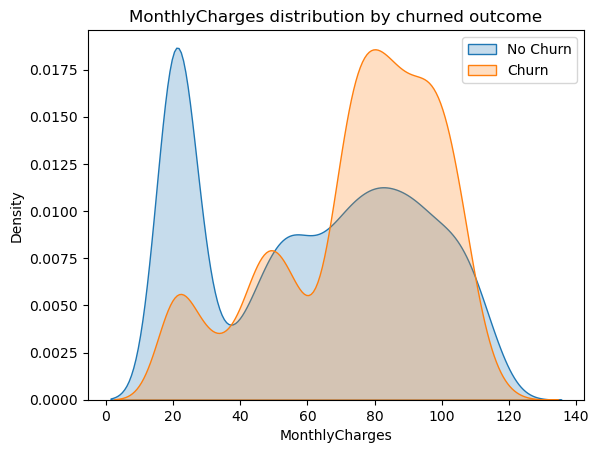

In [32]:
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges distribution by churned outcome')
plt.show()

In [33]:
churn_monthly = pd.Series([df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
                           df[df['Churn'] == 'No']['MonthlyCharges'].mean()],
                          index=['Churned', 'Non-Churned'])
churn_total = pd.Series([df[df['Churn'] == 'Yes']['TotalCharges'].mean(),
                       df[df['Churn'] == 'No']['TotalCharges'].mean()],
                       index = ['Churned', 'Non-Churned'])
print(churn_monthly)
print(churn_total)

Churned        74.604308
Non-Churned    61.387415
dtype: float64
Churned        1541.376548
Non-Churned    2560.264118
dtype: float64


<!-- <a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span>Data Visualization</div>
 -->

1. **High Churn rate** is seen for the customers **without dependants, online security, tech support**. Also customers who use **electronic checks** as a payment method, who use **our services less than 1 year** and who have **month-to-month contracts** are likely to churn frequently. 
Factors that also contribute to the high churn rate (although their impact is  less significant then the aforementioned variables) are:
Non-seniority, no partners, no phone service, no online backup, no device protection and paperless billing.

2. **Low Churn rate** is seen for the customers that **use our services more than 4 years**, that have **one-year / two-years contracts** and for the customers **without internet service, streamingTV and streamingMovies**.


3. Almost **no impact on churn** have the variables such as **gender, streamingTV, streamingMovies and MultipleLines**